In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


## Import IOS Zooplankton data and create dataframe

In [2]:
ls '/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'

'/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'


In [3]:
df=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2012-2015 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [4]:
df2=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2016-2017 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [5]:
df3=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2018-2019 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [6]:
df

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Branchiopoda,Diplostraca,Podonidae,Podon *sp. s1,12.22541,0.06113,51,2.63,0.67
1,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Cirripedia,Thecostraca,NaN,Cirripedia *sp. nauplii s1,30.56351,1.22254,51,2.63,0.67
2,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto pacifica juvenile s1,6.11270,1.44871,51,2.63,0.67
3,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. zoea s1,3.05635,0.07030,51,2.63,0.67
4,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,Hippolytidae,Hippolytidae *sp. mysis s2,0.09551,0.06017,51,2.63,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60225,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ctenophora,Tentaculata,Cydippida,Pleurobrachiidae,Pleurobrachia bachei s2,0.25316,0.31797,44,2.56,0.67
60226,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,48.60759,0.06319,44,2.56,0.67
60227,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Bivalvia,Pholadomyoida,NaN,Bivalvia *sp. veligers s1,21.60338,0.01296,44,2.56,0.67
60228,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Cephalopoda,Teuthida,Gonatidae,Berryteuthis magister s2,0.08439,0.46414,44,2.56,0.67


In [7]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [8]:
df2.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [9]:
SoGDF=pd.concat([df,df2,df3], ignore_index=True)

In [10]:
SoGDF

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.67,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Branchiopoda,Diplostraca,Podonidae,Podon *sp. s1,12.22541,0.06113,51,2.63,0.67
1,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.67,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Cirripedia,Thecostraca,NaN,Cirripedia *sp. nauplii s1,30.56351,1.22254,51,2.63,0.67
2,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.67,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto pacifica juvenile s1,6.11270,1.44871,51,2.63,0.67
3,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.67,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. zoea s1,3.05635,0.07030,51,2.63,0.67
4,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.67,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,Hippolytidae,Hippolytidae *sp. mysis s2,0.09551,0.06017,51,2.63,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134113,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.25,4/6/2018,12:00,Daylight,Bongo VNH,...,Cnidaria,Hydrozoa,Siphonophorae,Diphyidae,Dimophyes arctica nectophore s2,0.14493,0.08551,61,2.65,0.64
134114,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.25,4/6/2018,12:00,Daylight,Bongo VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,9.27536,0.01206,61,2.65,0.64
134115,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.25,4/6/2018,12:00,Daylight,Bongo VNH,...,Mollusca,Cephalopoda,Octopoda,Octopodidae,Octopus rubescens larvae s1,0.01812,0.02174,61,2.65,0.64
134116,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.25,4/6/2018,12:00,Daylight,Bongo VNH,...,Mollusca,Gastropoda,NaN,NaN,Gastropoda *sp. veligers s1,2.31884,0.00603,61,2.65,0.64


In [11]:
SoGDF['Biomass(mg/m3)']

0         0.06113
1         1.22254
2         1.44871
3         0.07030
4         0.06017
           ...   
134113    0.08551
134114    0.01206
134115    0.02174
134116    0.00603
134117    0.78841
Name: Biomass(mg/m3), Length: 134118, dtype: float64

In [12]:
SoGDF['Name'].str.contains('nauplii')

0         False
1          True
2         False
3         False
4         False
          ...  
134113    False
134114    False
134115    False
134116    False
134117    False
Name: Name, Length: 134118, dtype: bool

### Convert date to proper format

In [13]:
SoGDF['Date'][0],SoGDF['STN_TIME'][0]

('6/14/2012', '7:32')

In [14]:
SoGDF['Date'][1000:1020]

1000    6/15/2012
1001    6/15/2012
1002    6/15/2012
1003    6/15/2012
1004    6/15/2012
1005    6/15/2012
1006    6/15/2012
1007    6/15/2012
1008    6/15/2012
1009    6/15/2012
1010    6/15/2012
1011    6/15/2012
1012    6/15/2012
1013    6/15/2012
1014    6/15/2012
1015    6/15/2012
1016    6/15/2012
1017    6/15/2012
1018    6/15/2012
1019    6/15/2012
Name: Date, dtype: object

In [15]:
SoGDF['Date'][0].split('/')

['6', '14', '2012']

In [16]:
dateslist=list()

In [17]:
for el in SoGDF['Date']:
    dateslist.append(el.split('/'))

In [18]:
timeslist=list()
for el in SoGDF['STN_TIME']:
    timeslist.append(el.split(':'))

In [19]:
dts=list()
for ii,jj in zip(dateslist,timeslist):
    dts.append(dt.datetime(int(ii[2]),int(ii[0]),int(ii[1]),int(jj[0]),int(jj[1])))

In [20]:
df.loc[df.Twilight=='Daylight']['STN_TIME'].unique()

array(['7:32', '7:52', '3:30', '7:42', '7:49', '15:09', '16:30', '22:09',
       '22:27', '19:36', '19:53', '9:21', '9:35', '13:29', '13:45',
       '19:25', '19:43', '5:26', '5:43', '5:45', '5:47', '5:56', '5:59',
       '8:38', '8:39', '8:40', '8:41', '8:57', '11:10', '11:44', '11:45',
       '11:47', '11:48', '11:49', '12:40', '12:42', '15:14', '15:15',
       '15:16', '15:17', '15:18', '17:54', '17:55', '17:57', '17:58',
       '17:59', '5:39', '6:05', '14:47', '15:02', '19:13', '19:30',
       '14:32', '14:49', '20:04', '20:24', '20:27', '20:47', '9:37',
       '9:48', '13:57', '14:17', '19:41', '19:59', '7:18', '7:53', '9:25',
       '12:57', '13:09', '7:30', '7:45', '13:33', '13:36', '13:38',
       '10:00', '10:30', '11:00', '11:30', '12:30', '13:00', '13:30',
       '16:00', '17:00', '9:29', '10:26', '11:19', '13:39', '9:16',
       '10:04', '10:42', '11:03', '9:00', '9:41', '10:17', '10:40',
       '12:00', '9:33', '10:13', '11:11', '12:02', '12:32', '13:22',
       '9:57', '

In [21]:
SoGDF['dtUTC']=et.pac_to_utc(dts) #convert from Pac time to UTC

In [22]:
dtsutc=et.pac_to_utc(dts)

### Start by creating a group of zooplankton taxa of interest

In [23]:
SoGDF['Order:'].unique()

array(['Diplostraca', 'Thecostraca', 'Amphipoda', 'Decapoda',
       'Euphausiacea', 'Calanoida', 'Cyclopoida', 'Poecilostomatoida',
       'Halocyprida', 'Aphragmophora', 'Copelata', 'Leptothecate',
       'Siphonophorae', 'Trachylina', 'Cydippida', nan, 'Pholadomyoida',
       'Neotaenioglossa', 'Thecosomata', 'Aciculata', 'Canalipalpata',
       'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida',
       'Harpacticoida', 'Pleuronectiformes', 'Tricladida', 'Myodocopida',
       'Phaeogromia', 'Noctilucales', 'Octopoda', 'Actiniaria',
       'Foraminiferida', 'Monstrilloida', 'Oligotrichida', 'Mysida',
       'Acariformes', 'Lophogastrida', 'Ophidiiformes',
       'Thalassocalycida', 'Doliolida', 'Lepadomorpha', 'Cephalaspidea',
       'Sygnathiformes', 'Coronatae', 'Lobata', 'Arthr

In [24]:
#Create a list using ALL orders so that I can look at Total Biomass of all groups
colList=('Decapoda',#crabs
       'Calanoida', #copepods
        'Cyclopoida', #copepods
         'Poecilostomatoida',#copepods
         'Thecostraca', #barnacles
       'Copelata', #larvaceans
        'Harpacticoida', #copepods
       'Phaeogromia', #radiolarians
         'Noctilucales', #heterotrophic dinoflagellates
       'Foraminiferida', #foraminiferans
         'Monstrilloida', #copepods
         'Oligotrichida') #ciliates

In [25]:
SoGDF.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC'],
      dtype='object')

In [26]:
SoGDF.loc[0]

Key                                                      IOS2012005000901
region_name                                    Northern Strait of Georgia
Station                                                                22
PROJECT                                                         Str. Geo.
lon                                                              -124.272
lat                                                                 49.67
Date                                                            6/14/2012
STN_TIME                                                             7:32
Twilight                                                         Daylight
Net_Type                                                         SCOR VNH
Mesh_Size(um)                                                         236
Net_Mouth_Dia(m)                                                     0.56
DEPTH_STRT1                                                            50
DEPTH_END1                            

In [27]:
towIDlist=['Key', 'region_name', 'Station',  'lon', 'lat','Date', 'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)']

In [28]:
towIDlist2=['Key', 'region_name', 'Station',  'lon', 'lat', 'Date','dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)','CTD']

In [29]:
len(SoGDF.groupby(towIDlist)),len(SoGDF.groupby(towIDlist2)),len(SoGDF.groupby(['Key']))

(1346, 27391, 1346)

In [30]:
# Key is a unique identifier for each tow
# do not group by CTD due to NaN values

### Create a biomass dataframe

In [31]:
biomassDF=SoGDF.groupby(towIDlist,as_index=False).first()\
     .loc[:,towIDlist].copy(deep=True)

In [32]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),DEPTH_STRT1,DEPTH_END1,Bottom Depth(m)
0,HAK2016096000401,Northern Strait of Georgia,QU39,-125.099,50.031,10/24/2016,2016-10-24 17:19:00,Daylight,Bongo VNH,250,262,0,265
1,HAK2016096000501,Northern Strait of Georgia,QU39,-125.099,50.031,11/10/2016,2016-11-10 17:50:00,Daylight,Bongo VNH,250,253,0,265
2,HAK2016096000901,Northern Strait of Georgia,QU39,-125.099,50.031,12/5/2016,2016-12-05 21:29:00,Daylight,Bongo VNH,250,237,0,265
3,HAK2016096001001,Northern Strait of Georgia,QU39,-125.099,50.031,12/14/2016,2016-12-14 18:00:00,Daylight,Bongo VNH,250,237,0,265
4,HAK2017097000101,Northern Strait of Georgia,QU39,-125.099,50.031,1/5/2017,2017-01-05 19:30:00,Daylight,Bongo VNH,250,235,0,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,UBC9999099001401,Juan de Fuca,IOS-JF2,-124.000,48.300,8/27/2018,2018-08-28 01:45:00,Daylight,Bongo VNH,250,104,0,190
1342,UBC9999099001601,Central Strait of Georgia,ND1,-123.470,49.228,8/30/2016,2016-08-30 19:00:00,Daylight,Bongo VNH,250,309,0,0
1343,UBC9999099001801,Central Strait of Georgia,S4-1.5,-123.667,49.250,12/4/2017,2017-12-04 20:00:00,Daylight,Bongo VNH,250,375,0,380
1344,UBC9999099001901,Central Strait of Georgia,S4-1.5,-123.667,49.250,1/15/2018,2018-01-15 20:00:00,Daylight,Bongo VNH,250,375,0,380


In [33]:
def getbiomass(colname,key,origdf):        
    data2=SoGDF.loc[(SoGDF.Key==key)&(SoGDF['Order:']==colname)]
    if colname=='Calanoida' or colname=='Thecostraca':
        data2=data2.loc[data2.Name.str.contains('nauplii')]
    biomassArray=data2.loc[:,['Biomass(mg/m3)']]
    biomass=np.nansum(biomassArray)
    
    return biomass

In [34]:
for icol in colList:
    biomassDF[icol]=[getbiomass(icol,ikey,SoGDF) for ikey in biomassDF['Key']]

In [35]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,Cyclopoida,Poecilostomatoida,Thecostraca,Copelata,Harpacticoida,Phaeogromia,Noctilucales,Foraminiferida,Monstrilloida,Oligotrichida
0,HAK2016096000401,Northern Strait of Georgia,QU39,-125.099,50.031,10/24/2016,2016-10-24 17:19:00,Daylight,Bongo VNH,250,...,0.12696,0.02738,0.00000,0.35449,0.0,0.0,0.0,0.0,0.0,0.0
1,HAK2016096000501,Northern Strait of Georgia,QU39,-125.099,50.031,11/10/2016,2016-11-10 17:50:00,Daylight,Bongo VNH,250,...,0.26078,0.02275,0.00000,0.53606,0.0,0.0,0.0,0.0,0.0,0.0
2,HAK2016096000901,Northern Strait of Georgia,QU39,-125.099,50.031,12/5/2016,2016-12-05 21:29:00,Daylight,Bongo VNH,250,...,0.04310,0.00572,0.00000,0.11366,0.0,0.0,0.0,0.0,0.0,0.0
3,HAK2016096001001,Northern Strait of Georgia,QU39,-125.099,50.031,12/14/2016,2016-12-14 18:00:00,Daylight,Bongo VNH,250,...,0.02763,0.00730,0.00000,0.00506,0.0,0.0,0.0,0.0,0.0,0.0
4,HAK2017097000101,Northern Strait of Georgia,QU39,-125.099,50.031,1/5/2017,2017-01-05 19:30:00,Daylight,Bongo VNH,250,...,0.03746,0.00349,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,UBC9999099001401,Juan de Fuca,IOS-JF2,-124.000,48.300,8/27/2018,2018-08-28 01:45:00,Daylight,Bongo VNH,250,...,0.07730,0.02517,1.58202,0.32360,0.0,0.0,0.0,0.0,0.0,0.0
1342,UBC9999099001601,Central Strait of Georgia,ND1,-123.470,49.228,8/30/2016,2016-08-30 19:00:00,Daylight,Bongo VNH,250,...,0.65139,0.07739,0.00000,0.09850,0.0,0.0,0.0,0.0,0.0,0.0
1343,UBC9999099001801,Central Strait of Georgia,S4-1.5,-123.667,49.250,12/4/2017,2017-12-04 20:00:00,Daylight,Bongo VNH,250,...,0.10812,0.03189,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1344,UBC9999099001901,Central Strait of Georgia,S4-1.5,-123.667,49.250,1/15/2018,2018-01-15 20:00:00,Daylight,Bongo VNH,250,...,0.06304,0.00058,0.00000,0.01565,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
biomassDF.keys

<bound method NDFrame.keys of                    Key                 region_name  Station      lon     lat  \
0     HAK2016096000401  Northern Strait of Georgia     QU39 -125.099  50.031   
1     HAK2016096000501  Northern Strait of Georgia     QU39 -125.099  50.031   
2     HAK2016096000901  Northern Strait of Georgia     QU39 -125.099  50.031   
3     HAK2016096001001  Northern Strait of Georgia     QU39 -125.099  50.031   
4     HAK2017097000101  Northern Strait of Georgia     QU39 -125.099  50.031   
...                ...                         ...      ...      ...     ...   
1341  UBC9999099001401                Juan de Fuca  IOS-JF2 -124.000  48.300   
1342  UBC9999099001601   Central Strait of Georgia      ND1 -123.470  49.228   
1343  UBC9999099001801   Central Strait of Georgia   S4-1.5 -123.667  49.250   
1344  UBC9999099001901   Central Strait of Georgia   S4-1.5 -123.667  49.250   
1345  UBC9999099002001   Central Strait of Georgia   S4-1.5 -123.667  49.250   

         

### Import model data for comparison with observations

In [37]:
import netCDF4 as nc

In [38]:
ftemp=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [39]:
ftemp.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [40]:
ftemp.variables['e3t_0']

<class 'netCDF4._netCDF4.Variable'>
float64 e3t_0(t, z, y, x)
    _FillValue: nan
    standard_name: e3t_0
    long_name: grid spacing on T-grid in w direction
    units: m
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling on

In [41]:
ftemp.variables['e3t_1d'][:]

masked_array(data=[[ 1.00000115,  1.00000501,  1.00001253,  1.00002718,
                     1.0000557 ,  1.00011125,  1.00021946,  1.0004302 ,
                     1.00084067,  1.00164012,  1.0031971 ,  1.00622914,
                     1.01213271,  1.02362358,  1.04597551,  1.08940061,
                     1.17356428,  1.33592899,  1.64636781,  2.22990285,
                     3.29248567,  5.11998508,  7.97451506, 11.8252972 ,
                    16.10792044, 19.95870258, 22.81323256, 24.64073198,
                    25.70331479, 26.28684983, 26.59728865, 26.75965336,
                    26.84381704, 26.88724213, 26.90959407, 26.92108493,
                    26.9269885 , 26.93002054, 26.93157752, 26.93237697]],
             mask=False,
       fill_value=1e+20)

In [42]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2019,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [43]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [44]:
#renaming columns to match with model columns
biomassDF.rename(columns={'lon':'Lon','lat':'Lat'},inplace=True) 

In [45]:
biomassDF.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1',
       'Bottom Depth(m)', 'Decapoda', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Thecostraca', 'Copelata', 'Harpacticoida',
       'Phaeogromia', 'Noctilucales', 'Foraminiferida', 'Monstrilloida',
       'Oligotrichida'],
      dtype='object')

In [46]:
#rename columns
biomassDF.rename(columns={'DEPTH_STRT1':'Z_lower','DEPTH_END1':'Z_upper'},inplace=True)

In [47]:
#create new columns
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['Month']=[ii.month for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])

In [48]:
CentralSoG=df.loc[df.region_name=='Central Strait of Georgia']
NorthernSoG=df.loc[df.region_name=='Northern Strait of Georgia']
SouthernSoG=df.loc[df.region_name=='Southern Strait of Georgia']
Baynes=df.loc[df.region_name=='Baynes Sound']
TidalMixed=df.loc[df.region_name=='Tidal Mixed']
GulfIslands=df.loc[df.region_name=='Gulf Islands']
NearshoreNE=df.loc[df.region_name=='Nearshore-North East']

In [49]:
#Determine which species are making up most of the biomass in each Order
CentralSoG.loc[df['Order:']=='Calanoida',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .sum().sort_values(['Biomass(mg/m3)'],ascending=False).head(50)

,Name,Biomass(mg/m3)
132,Metridia pacifica 6F,1234.14206
156,Neocalanus plumchrus 5,777.11123
39,Calanus marshallae 5,506.17903
44,Calanus pacificus 5,232.20398
45,Calanus pacificus 6F,192.26754
133,Metridia pacifica 6M,143.82401
130,Metridia pacifica 5F,133.57607
131,Metridia pacifica 5M,99.30938
178,Paraeuchaeta elongata 6F,79.66687
155,Neocalanus plumchrus 4,78.80934


In [50]:
biomassDF['Calanoida']

0       0.00123
1       0.00085
2       0.00069
3       0.00034
4       0.00033
         ...   
1341    0.00108
1342    0.00000
1343    0.00000
1344    0.00000
1345    0.00731
Name: Calanoida, Length: 1346, dtype: float64

In [51]:
#biomassDF[biomassDF['Calanoida'].str.contains('nauplii', regex=False)]

#### Need to convert biomass from mg DW to mg C (use 0.45 conversion factor)

In [52]:
biomassDF['Total']=((biomassDF['Calanoida']+biomassDF['Thecostraca']+biomassDF['Decapoda']+biomassDF['Cyclopoida']+biomassDF['Poecilostomatoida']+\
                    biomassDF['Copelata']+\
                   biomassDF['Harpacticoida']+biomassDF['Phaeogromia']+\
                   biomassDF['Noctilucales']+biomassDF['Foraminiferida']+biomassDF['Monstrilloida']+\
                    biomassDF['Oligotrichida'])*0.45)



In [53]:
#Create column of the Main Groups based on biomass-dominant species
biomassDF['TrueMicro']=((biomassDF['Phaeogromia']+\
                   biomassDF['Noctilucales']+biomassDF['Foraminiferida']+\
                    biomassDF['Oligotrichida'])*0.45)

In [54]:
biomassDF['Nauplii']=(biomassDF['Calanoida']+biomassDF['Thecostraca'])*0.45

In [55]:
#All other groups not included in 'Main Groups'
biomassDF['SmallCopepods']=((biomassDF['Cyclopoida']+biomassDF['Poecilostomatoida']+\
                   biomassDF['Harpacticoida']+biomassDF['Monstrilloida'])*0.45)

In [56]:
#Create columns for specific groups of interest using slightly diff names to avoid overwriting original columns
biomassDF['Decapods']=biomassDF['Decapoda']*0.45
biomassDF['Radiolarians']=biomassDF['Phaeogromia']*0.45
biomassDF['Dinoflagellates']=biomassDF['Noctilucales']*0.45
biomassDF['Foraminiferans']=biomassDF['Foraminiferida']*0.45
biomassDF['Ciliates']=biomassDF['Oligotrichida']*0.45

In [57]:
#biomassDF.to_excel("SoGBiomassDF.xlsx")

In [58]:
biomassDF2013=biomassDF[biomassDF.Year==2013]

In [59]:
biomassDF2013

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,YD,Total,TrueMicro,Nauplii,SmallCopepods,Decapods,Radiolarians,Dinoflagellates,Foraminiferans,Ciliates
69,IOS2013012001701,Central Strait of Georgia,41,-123.372,49.055,4/11/2013,2013-04-11 12:39:00,Daylight,SCOR VNH,236,...,101,13.482333,0.000000,0.454532,0.860922,6.827405,0.0,0.000000,0.0,0.0
70,IOS2013012001801,Central Strait of Georgia,41,-123.389,49.055,4/11/2013,2013-04-11 13:05:00,Daylight,SCOR VNH,236,...,101,5.902668,0.000000,0.015737,1.136038,3.536824,0.0,0.000000,0.0,0.0
71,IOS2013012002501,Central Strait of Georgia,CPF1,-124.086,49.367,4/11/2013,2013-04-11 21:47:00,Daylight,SCOR VNH,236,...,101,60.860142,0.158224,1.016672,1.822842,1.812285,0.0,0.158224,0.0,0.0
72,IOS2013012002601,Central Strait of Georgia,CPF1,-124.088,49.367,4/11/2013,2013-04-11 22:02:00,Daylight,SCOR VNH,236,...,101,9.108274,0.000000,0.354263,0.557779,0.110574,0.0,0.000000,0.0,0.0
73,IOS2013012003101,Northern Strait of Georgia,CPF2,-124.500,49.467,4/11/2013,2013-04-12 02:13:00,Daylight,SCOR VNH,236,...,102,12.077006,0.000000,2.921049,1.629220,0.481221,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,PBS2013043000401,Central Strait of Georgia,GS01,-123.398,48.936,6/26/2013,2013-06-26 16:38:00,Daylight,Bongo VNH,253,...,177,1.435001,0.000000,0.057686,0.387221,0.936734,0.0,0.000000,0.0,0.0
979,PBS2013043005701,Northern Strait of Georgia,GS11,-124.569,49.484,6/30/2013,2013-06-30 14:06:00,Daylight,Bongo VNH,253,...,181,0.420341,0.000000,0.000000,0.227799,0.170847,0.0,0.000000,0.0,0.0
980,PBS2013045000201,Central Strait of Georgia,CPF1,-124.077,49.370,6/25/2013,2013-06-25 16:31:00,Daylight,Bongo VNH,253,...,176,0.514562,0.000000,0.070772,0.187106,0.256684,0.0,0.000000,0.0,0.0
981,PBS2013045000401,Central Strait of Georgia,GEO1,-123.750,49.249,6/25/2013,2013-06-25 19:20:00,Daylight,Bongo VNH,253,...,176,0.988704,0.000000,0.000000,0.105885,0.789327,0.0,0.000000,0.0,0.0


In [60]:
#Match observation data with model output
##Error warning is fine as long as the difference between seafloor value is <3ish
data=et.matchData(biomassDF,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

(Lat,Lon)= 48.596000000000004 -123.28200000000001  not matched to domain


In [61]:
data

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,Radiolarians,Dinoflagellates,Foraminiferans,Ciliates,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
0,IOS2012025013601,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:26:00,Daylight,Bongo VNH,236,...,0.0,0.0,0.0,0.0,583,162,0.134706,0.216811,0,34
1,IOS2012025013701,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:43:00,Daylight,MPS VNH,200,...,0.0,0.0,0.0,0.0,583,162,0.000422,0.034365,32,34
2,IOS2012025013702,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:45:00,Daylight,MPS VNH,200,...,0.0,0.0,0.0,0.0,583,162,0.001816,0.059686,30,32
3,IOS2012025013703,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:47:00,Daylight,MPS VNH,200,...,0.0,0.0,0.0,0.0,583,162,0.016602,0.101699,26,30
4,IOS2012025013704,Northern Strait of Georgia,CPF2,-124.501,49.467,5/21/2012,2012-05-21 12:56:00,Daylight,MPS VNH,200,...,0.0,0.0,0.0,0.0,583,162,0.089635,0.266278,23,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,PBS2019053019001,Central Strait of Georgia,108,-123.683,49.177,9/23/2019,2019-09-23 17:17:00,Daylight,Bongo VNH,253,...,0.0,0.0,0.0,0.0,468,246,0.100699,0.540060,0,29
1341,PBS2019053025201,Tidal Mixed,140,-123.347,48.273,9/27/2019,2019-09-27 19:27:00,Daylight,Bongo VNH,253,...,0.0,0.0,0.0,0.0,270,183,0.123688,0.745802,0,30
1342,IOS2019062000201,Tidal Mixed,59,-123.244,48.631,9/30/2019,2019-10-01 02:12:00,Daylight,SCOR VNH,236,...,0.0,0.0,0.0,0.0,332,242,0.123007,0.722881,0,30
1343,IOS2019062005501,Central Strait of Georgia,GEO1,-123.749,49.250,10/3/2019,2019-10-03 13:49:00,Daylight,SCOR VNH,236,...,0.0,0.0,0.0,0.0,487,245,0.052850,0.339300,0,37


In [62]:
data.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Decapoda', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Thecostraca', 'Copelata', 'Harpacticoida',
       'Phaeogromia', 'Noctilucales', 'Foraminiferida', 'Monstrilloida',
       'Oligotrichida', 'Year', 'Month', 'YD', 'Total', 'TrueMicro', 'Nauplii',
       'SmallCopepods', 'Decapods', 'Radiolarians', 'Dinoflagellates',
       'Foraminiferans', 'Ciliates', 'j', 'i', 'mod_microzooplankton',
       'mod_mesozooplankton', 'k_upper', 'k_lower'],
      dtype='object')

In [63]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [64]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [65]:
#create columns for log10 +0.001 transformed zooplankton
data['L10Total']=logt(data['Total'])
data['L10TrueMicro']=logt(data['TrueMicro'])
data['L10Nauplii']=logt(data['Nauplii'])
data['L10SmallCopepods']=logt(data['SmallCopepods'])
data['L10Decapods']=logt(data['Decapods'])
data['L10Radiolarians']=logt(data['Radiolarians'])
data['L10Dinoflagellates']=logt(data['Dinoflagellates'])
data['L10Foraminiferans']=logt(data['Foraminiferans'])
data['L10Ciliates']=logt(data['Ciliates'])
data['L10Calanoida']=logt(data['Calanoida'])
data['L10Cyclopoida']=logt(data['Cyclopoida'])
data['L10Poecilostomatoida']=logt(data['Poecilostomatoida'])
data['L10Copelata']=logt(data['Copelata'])
data['L10Harpacticoida']=logt(data['Harpacticoida'])
data['L10Monstrilloida']=logt(data['Monstrilloida']) 
    

#Convert model values to mg C m-3 by multiplying value * C:N of 5.7 * molecular weight of C (12)
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton']*5.7*12)
data['L10mod_microzooplankton']=logt(data['mod_microzooplankton']*5.7*12)



In [66]:
#look at data for individual years
View2012=data.loc[data.Year==2012]
View2013=data.loc[data.Year==2013]
View2014=data.loc[data.Year==2014]
View2015=data.loc[data.Year==2015]


In [67]:
#look at data for a specific region
ViewCentralSoG=data.loc[data.region_name=='Central Strait of Georgia']
ViewNorthernSoG=data.loc[data.region_name=='Northern Strait of Georgia']
ViewSouthernSoG=data.loc[data.region_name=='Southern Strait of Georgia']
ViewBaynes=data.loc[data.region_name=='Baynes Sound']
ViewTidalMixed=data.loc[data.region_name=='Tidal Mixed']
ViewNearshoreNE=data.loc[data.region_name=='Nearshore-North East']
ViewGulfIslands=data.loc[data.region_name=='Gulf Islands']

In [68]:
#look at data for an individual station
ViewGEO1=data.loc[data.Station=='GEO1']

In [69]:
View2015

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,L10Foraminiferans,L10Ciliates,L10Calanoida,L10Cyclopoida,L10Poecilostomatoida,L10Copelata,L10Harpacticoida,L10Monstrilloida,L10mod_mesozooplankton,L10mod_microzooplankton
310,IOS2015001000201A,Tidal Mixed,59,-123.245,48.614,2/10/2015,2015-02-11 05:06:00,Night,Bongo VNH,236,...,-3.0,-3.000000,-3.000000,-1.327810,-1.883724,-0.851274,-1.862013,-3.0,1.229521,0.298248
311,IOS2015001000701A,Juan de Fuca,JF02,-124.002,48.300,2/11/2015,2015-02-11 12:09:00,Night,Bongo VNH,236,...,-3.0,-3.000000,-2.549751,-2.542118,-1.619608,-1.334794,-3.000000,-3.0,1.044618,-0.231758
312,IOS2015099000101,Northern Strait of Georgia,GEO_STR,-124.092,49.583,2/13/2015,2015-02-14 04:03:00,Night,SCOR VNH,236,...,-3.0,-3.000000,-2.910095,-0.453149,-2.197226,-0.934010,-3.000000,-3.0,0.905666,0.218069
313,IOS2015099000201,Central Strait of Georgia,GEO1,-123.748,49.252,2/15/2015,2015-02-15 09:22:00,Night,SCOR VNH,236,...,-3.0,-3.000000,-3.000000,-0.466482,-1.843148,-1.041579,-2.211832,-3.0,0.862021,0.115057
314,IOS2015099000301,Northern Strait of Georgia,11,-124.718,49.705,2/15/2015,2015-02-15 14:36:00,Daylight,SCOR VNH,236,...,-3.0,-3.000000,-2.291579,-0.445474,-1.958607,-0.466406,-3.000000,-3.0,0.830411,0.217484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.287,49.655,10/5/2015,2015-10-05 18:43:00,Daylight,Ring VNH,250,...,-3.0,-3.000000,-2.853872,-0.466139,-1.218604,0.273036,-3.000000,-3.0,1.462666,0.596206
650,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.666,49.692,10/5/2015,2015-10-05 19:15:00,Daylight,Ring VNH,250,...,-3.0,-3.000000,-3.000000,-0.435760,-1.405055,-0.197144,-3.000000,-3.0,1.433234,0.604695
651,PSF2015098005801,Baynes Sound,BS-1,-124.867,49.608,10/5/2015,2015-10-05 20:38:00,Daylight,Ring VNH,250,...,-3.0,-0.355862,-1.805208,0.647887,-0.672233,1.042255,-0.785554,-3.0,1.917660,1.124831
652,PSF2015097005101,Nearshore-North East,IS-2,-124.083,49.637,10/5/2015,2015-10-05 20:40:00,Daylight,Ring VNH,250,...,-3.0,-3.000000,-2.315155,-0.407379,-0.493495,2.076327,-3.000000,-3.0,1.860374,1.037354


### Calculate Mean and SEMs

In [70]:
#monthly mean and SEM for entire SoG
monthlymean=data.groupby(['Month']).mean()

In [71]:
monthlysem=data.groupby(['Month']).sem()

In [72]:
#monthly mean and SEM for Central SoG Only
monthlymeanCentral=ViewCentralSoG.groupby(['Month']).mean()
monthlymeanBaynes=ViewBaynes.groupby(['Month']).mean()
monthlymeanNorthern=ViewNorthernSoG.groupby(['Month']).mean()
monthlymeanSouthern=ViewSouthernSoG.groupby(['Month']).mean()
monthlymeanTidal=ViewTidalMixed.groupby(['Month']).mean()
monthlymeanNearshoreNE=ViewNearshoreNE.groupby(['Month']).mean()
monthlymeanGulfIslands=ViewGulfIslands.groupby(['Month']).mean()



In [73]:
monthlysemCentral=ViewCentralSoG.groupby(['Month']).sem()

In [74]:
#monthly mean and SEM for station GEO1 only
monthlymeanGEO1=ViewGEO1.groupby(['Month']).mean()


In [75]:
monthlysemGEO1=ViewGEO1.groupby(['Month']).sem()

In [76]:
monthlymean2012=View2012.groupby(['Month']).mean()
monthlymean2013=View2013.groupby(['Month']).mean()
monthlymean2014=View2014.groupby(['Month']).mean()
monthlymean2015=View2015.groupby(['Month']).mean()

In [77]:
monthlysem2012=View2012.groupby(['Month']).sem()
monthlysem2013=View2013.groupby(['Month']).sem()
monthlysem2014=View2014.groupby(['Month']).sem()
monthlysem2015=View2015.groupby(['Month']).sem()

## Figure showing observation locations of IOS zooplankton sampling

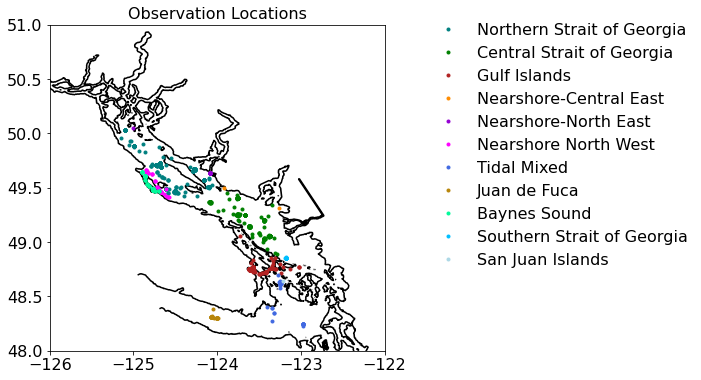

In [114]:


fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue')
datreg=dict()
for ind, iregion in enumerate(data.region_name.unique()):
    datreg[iregion] = data.loc[data.region_name==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(48,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -122);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1.1, 1.05),frameon=False)
#fig.savefig('SoGObservationLocationsMicrozoop.png',bbox_inches='tight')

In [79]:
np.shape([monthlymean['L10Total']-monthlysem['L10Total'],
 monthlymean['L10Total']+monthlysem['L10Total']])


(2, 12)

### Plot seasonal cycles of Model vs Obs for different regions in Strait of Georgia

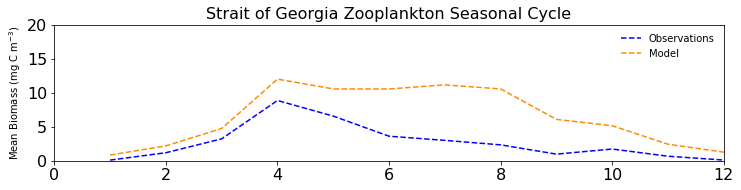

In [111]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10Total']),'--',color='blue',label='Observations')
ax.plot(logt_inv(monthlymean['L10mod_microzooplankton']),'--',color='darkorange',label='Model')
ax.set_ylim(0,20)
ax.set_xlim(0,12)
ax.set_title('Strait of Georgia Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m$^{-3}$)',fontsize=10)
ax.legend(fontsize=10,frameon=False)
#fig.savefig('SoGMicrozoopSeasonalCycle.png',bbox_inches='tight')



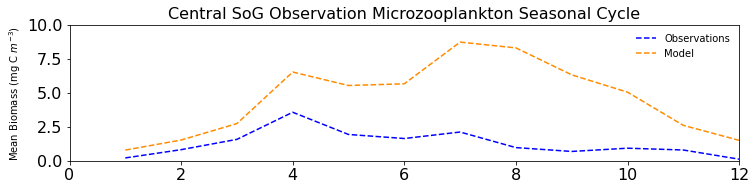

In [109]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10Total']),'--',color='blue',label='Observations')
ax.plot(logt_inv(monthlymeanCentral['L10mod_microzooplankton']),'--',color='darkorange',label='Model')
ax.set_ylim(0,10)
ax.set_xlim(0,12)
ax.set_title('Central SoG Observation Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C $m^{-3}$)',fontsize=10)
ax.legend(fontsize=10,frameon=False)
#fig.savefig('CentralSoGMicrozoopSeasonalCycle.png',bbox_inches='tight')


Text(0, 0.5, 'Mean Biomass (mg C m-3)')

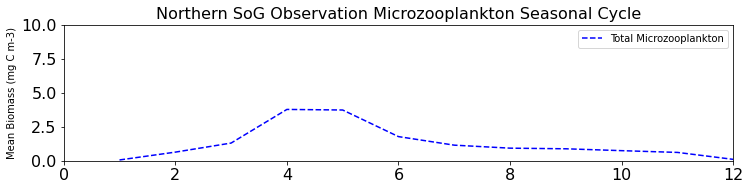

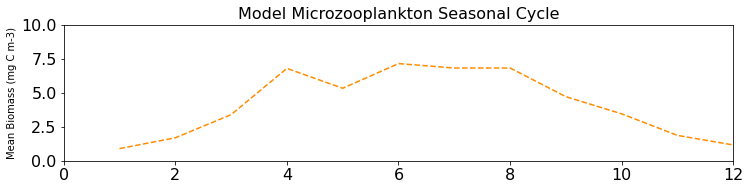

In [82]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanNorthern['L10Total']),'--',color='blue',label='Total Microzooplankton')
ax.set_ylim(0,10)
ax.set_xlim(0,12)
ax.set_title('Northern SoG Observation Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanNorthern['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,10)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

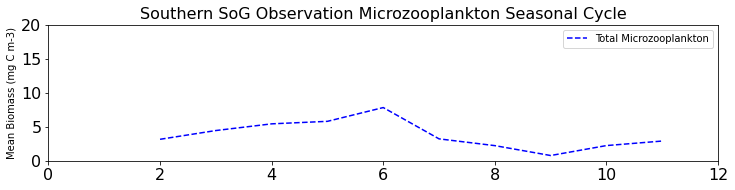

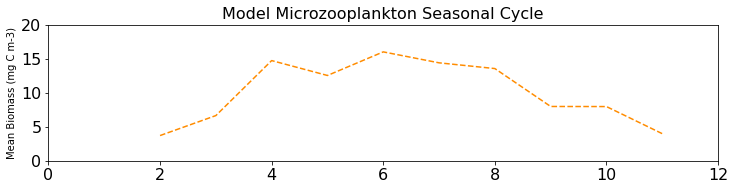

In [83]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouthern['L10Total']),'--',color='blue',label='Total Microzooplankton')
ax.set_ylim(0,20)
ax.set_xlim(0,12)
ax.set_title('Southern SoG Observation Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouthern['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,20)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

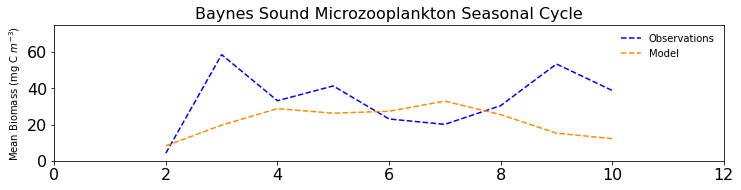

In [108]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanBaynes['L10Total']),'--',color='blue',label='Observations')
ax.plot(logt_inv(monthlymeanBaynes['L10mod_microzooplankton']),'--',color='darkorange',label='Model')
ax.set_ylim(0,75)
ax.set_xlim(0,12)
ax.set_title('Baynes Sound Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C $m^{-3}$)',fontsize=10)
ax.legend(fontsize=10,frameon=False)
#fig.savefig('BaynesSoundMicrozoopSeasonalCycle.png',bbox_inches='tight')


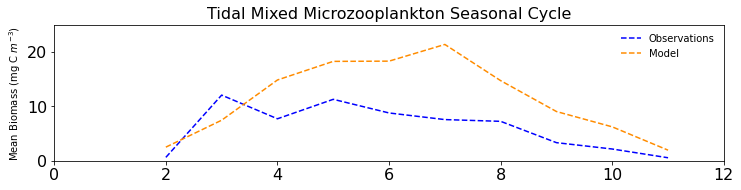

In [85]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanTidal['L10Total']),'--',color='blue',label='Observations')
ax.plot(logt_inv(monthlymeanTidal['L10mod_microzooplankton']),'--',color='darkorange',label='Model')
ax.set_ylim(0,25)
ax.set_ylim(0,25)
ax.set_xlim(0,12)
ax.set_title('Tidal Mixed Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C $m^{-3}$)',fontsize=10)
ax.legend(fontsize=10,frameon=False)
#fig.savefig('TidalMixedMicrozoopSeasonalCycle.png',bbox_inches='tight')

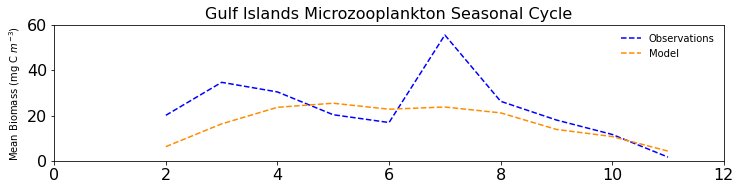

In [107]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanGulfIslands['L10Total']),'--',color='blue',label='Observations')
ax.plot(logt_inv(monthlymeanGulfIslands['L10mod_microzooplankton']),'--',color='darkorange',label='Model')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Gulf Islands Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C $m^{-3}$)',fontsize=10)
ax.legend(fontsize=10,frameon=False)
#fig.savefig('GulfIslandsMicrozoopSeasonalCycle.png',bbox_inches='tight')

In [87]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [88]:
def yd(idt):
    if type(idt)==dt.datetime:
        yd=(idt-dt.datetime(idt.year-1,12,31)).days
    else: # assume array or pandas
        yd=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in idt]
    return yd

data['yd']=yd(data['dtUTC'])
data['Year']=[ii.year for ii in data['dtUTC']]

#### By Day of Year

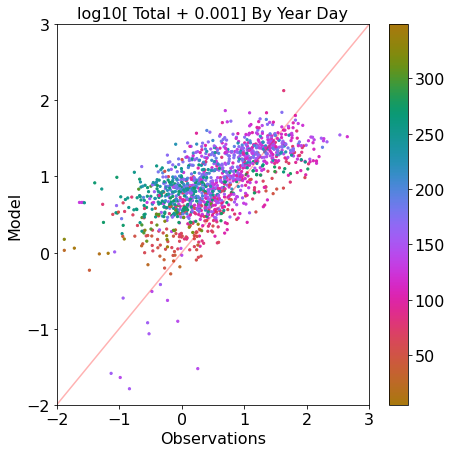

In [106]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter((data['L10Total']),(data['L10mod_microzooplankton']),
          c=data['yd'],s=5,cmap=cmocean.cm.phase)

ax.set_title('log10[ Total + 0.001] By Year Day')
ax.set_xlabel('Observations')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-2,3)
ax.set_ylim(-2,3);
fig.colorbar(m)
#fig.savefig('SoGMicrozoopModelvsObsbyDOY.png',bbox_inches='tight')

In [90]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [102]:


def byRegion(ax,obsvar,modvar,lims):
    SoG=[]
    for ind, iregion in enumerate(data.region_name.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SoG0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SoG.append(SoG0)
        
    l=ax.legend(handles=[ip[0][0] for ip in SoG])
    ax.set_xlabel('Observations')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SoG,l



In [103]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Observations')
        axi.set_ylabel('Model')
    SoG=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SoG=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SoG=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SoG=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

### Plots of Total Zooplankton vs. model zooplankton by Region

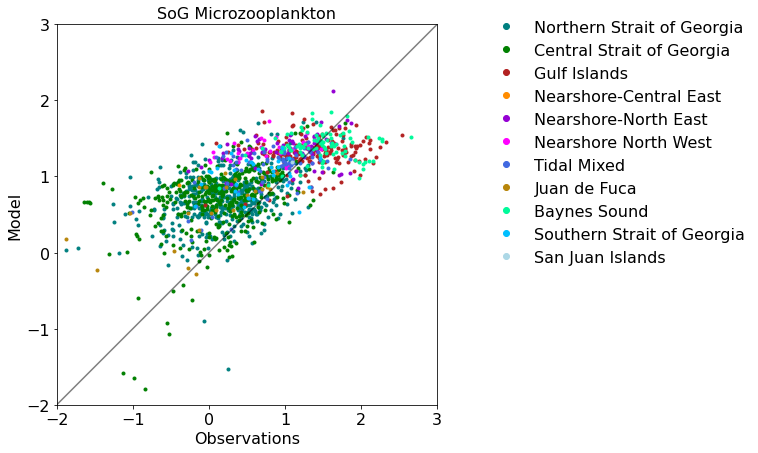

In [105]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10Total','L10mod_microzooplankton',(-2,3)) #change between mod_total and mod_mesozooplankton
ax.set_title('SoG Microzooplankton')
ax.legend(bbox_to_anchor=(1.1, 1.05),markerscale=2.,frameon=False)
#fig.savefig('SoGMicrozoopModelvsObs.png',bbox_inches='tight')

#fig, ax = plt.subplots(1,4,figsize = (16,3.3))
#bySeason(ax,'L10Total','L10mod_mesozooplankton',(-1,3))


In [94]:
data['L10Total']=logt(data['Total'])
data['L10TrueMicro']=logt(data['TrueMicro'])
data['L10Decapods']=logt(data['Decapods'])
data['L10Radiolarians']=logt(data['Radiolarians'])
data['L10Dinoflagellates']=logt(data['Dinoflagellates'])
data['L10Foraminiferans']=logt(data['Foraminiferans'])
data['L10Ciliates']=logt(data['Ciliates'])
data['L10Calanoida']=logt(data['Calanoida'])
data['L10Cyclopoida']=logt(data['Cyclopoida'])
data['L10Poecilostomatoida']=logt(data['Poecilostomatoida'])
data['L10Copelata']=logt(data['Copelata'])
data['L10Harpacticoida']=logt(data['Harpacticoida'])
data['L10Monstrilloida']=logt(data['Monstrilloida']) 

#### 

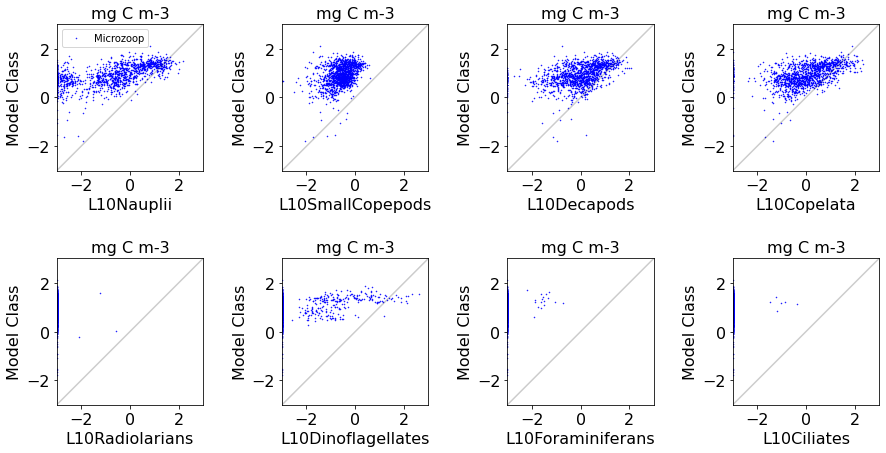

In [99]:
fig,ax=plt.subplots(2,4,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
fig.subplots_adjust(hspace=.6)
ax=ax.flatten()

taxa=('L10Nauplii','L10SmallCopepods','L10Decapods','L10Copelata', 'L10Radiolarians','L10Dinoflagellates','L10Foraminiferans','L10Ciliates',
     )

mvar1=data['L10mod_microzooplankton']
mvar2=data['L10mod_mesozooplankton']

for ii in range(0,len(taxa)):
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar1),'.',ms=1,color='blue',label='Microzoop')
    #ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar2),'.',ms=1,color='red',label='Mesozoop')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(taxa[ii])
    ax[ii].set_title('mg C m-3')
    ax[ii].plot((-3,3),(-3,3),'k-',alpha=.2)
    ax[ii].set_xlim((-3,3))
    ax[ii].set_ylim((-3,3))
    ax[ii].set_aspect(1)
ax[0].legend(loc=2, fontsize = 'medium')